# Self-Organising Maps

In [2]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from evaluation_metrics import neighborhood_preservation_trustworthiness

import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# reading data
data = pd.read_csv("../notebooks/cash-crops-nepal.csv")
# visualize some data
data.iloc[:10,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [33]:
data.shape

(105, 6)

In [34]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


We will not use "Crop" labels for training SOM. But we will use it to check if the clustering by SOM worked fine or not. We will also drop the “Year AD” and “Year BS” columns.

In [35]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:10,:]

,Area,Production,Yield
86,19840,23452,1182
2,142890,82500,577
49,6520,6005,921
48,7290,6980,957
89,13000,16000,1231
39,140171,1531315,10925
25,81570,640910,7857
14,190429,119731,629
78,58126,2103426,36187
60,3597,3460,962


In [36]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
86,0.104186,0.009870,0.029391
2,0.750358,0.034721,0.014347
49,0.034238,0.002527,0.022901
48,0.038282,0.002938,0.023796
89,0.068267,0.006734,0.030609
39,0.736080,0.644465,0.271651
25,0.428349,0.269732,0.195365
14,1.000000,0.050390,0.015640
78,0.305237,0.885242,0.899794
60,0.018889,0.001456,0.023920


## Training SOM

Now let’s train the data in a 3 x 3 SOM network using 3 input features. 

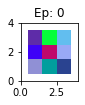

In [37]:
from our_som1 import SOM

# som = SOM(x_size, y_size, num_features)
agri_som = SOM(3,3,3)

# Initial weights
init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

Random weights (3 features) are given to each of 9 (3×3) neurons. The above figure shows how the neural network looks like in the beginning.

In [38]:
agri_som.train(trunc_data.values,num_epochs=200,init_learning_rate=0.01)

ValueError: num must be 1 <= num <= 10, not 1.0

<Figure size 432x288 with 0 Axes>

Notice: 

- after 60 Epochs, the network changed from random colors (initialization) to nearly constant color; this means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data.

- Slowly, the network develops different color according to input data structures/patterns, but, you can notice similar colors are neighbors to one another.

- Since there was a random initialization, the positions of colors may change but the topology will be preserved.

## Prediction and Analysis

In [41]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:10]

,Area,Production,Yield,bmu,bmu_idx
86,0.104186,0.009870,0.029391,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
2,0.750358,0.034721,0.014347,"[[0.39964836068367754, 0.1990548450240243, 0.1...","[0, 0]"
49,0.034238,0.002527,0.022901,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
48,0.038282,0.002938,0.023796,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
89,0.068267,0.006734,0.030609,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
39,0.736080,0.644465,0.271651,"[[0.5358489342282917, 0.3865157786262789, 0.38...","[0, 2]"
25,0.428349,0.269732,0.195365,"[[0.3858345928524416, 0.23571988834525756, 0.2...","[0, 1]"
14,1.000000,0.050390,0.015640,"[[0.39964836068367754, 0.1990548450240243, 0.1...","[0, 0]"
78,0.305237,0.885242,0.899794,"[[0.5358489342282917, 0.3865157786262789, 0.38...","[0, 2]"
60,0.018889,0.001456,0.023920,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"


Now, joininig the labelled initial data

In [42]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:10]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
86,1986/87,2043/44,JUTE,19840,23452,1182,0.104186,0.009870,0.029391,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
2,1986/87,2043/44,OILSEED,142890,82500,577,0.750358,0.034721,0.014347,"[[0.39964836068367754, 0.1990548450240243, 0.1...","[0, 0]"
49,1991/92,2048/49,TOBACCO,6520,6005,921,0.034238,0.002527,0.022901,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
48,1990/91,2047/48,TOBACCO,7290,6980,957,0.038282,0.002938,0.023796,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
89,1989/90,2046/47,JUTE,13000,16000,1231,0.068267,0.006734,0.030609,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"
39,2002/2003,2059/60,POTATO,140171,1531315,10925,0.736080,0.644465,0.271651,"[[0.5358489342282917, 0.3865157786262789, 0.38...","[0, 2]"
25,1988/89,2045/46,POTATO,81570,640910,7857,0.428349,0.269732,0.195365,"[[0.3858345928524416, 0.23571988834525756, 0.2...","[0, 1]"
14,1998/99,2055/56,OILSEED,190429,119731,629,1.000000,0.050390,0.015640,"[[0.39964836068367754, 0.1990548450240243, 0.1...","[0, 0]"
78,1999/2000,2056/57,SUGARCANE,58126,2103426,36187,0.305237,0.885242,0.899794,"[[0.5358489342282917, 0.3865157786262789, 0.38...","[0, 2]"
60,2002/2003,2059/60,TOBACCO,3597,3460,962,0.018889,0.001456,0.023920,"[[0.28720490865493736, 0.0652025471054226, 0.0...","[2, 0]"


Visualize how the original data gets clustered in the SOM

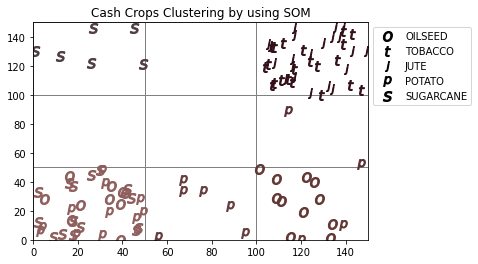

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()

In [43]:
dataT = trunc_data[data['Crop']=='TOBACCO']
print(dataT)

        Area  Production     Yield
49  0.034238    0.002527  0.022901
48  0.038282    0.002938  0.023796
60  0.018889    0.001456  0.023920
53  0.032190    0.002319  0.022354
51  0.035404    0.002619  0.022950
57  0.022491    0.001603  0.022105
55  0.025579    0.001618  0.019619
43  0.045581    0.001970  0.013402
62  0.015770    0.001269  0.024965
45  0.033976    0.001877  0.017132
56  0.023221    0.001646  0.021981
50  0.034974    0.002534  0.022478
58  0.022192    0.001672  0.023373
54  0.029775    0.001885  0.019643
46  0.038334    0.002264  0.018326
47  0.039962    0.002778  0.021558
52  0.031655    0.002292  0.022478
42  0.044899    0.002706  0.018699
61  0.017844    0.001393  0.024219
59  0.020023    0.001584  0.024542
44  0.046316    0.002058  0.013775


/tmp/ipykernel_55047/2686195632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='TOBACCO']


In [44]:
print(dataT.max())

Area          0.046316
Production    0.002938
Yield         0.024965
dtype: float64


In [45]:
dataT = trunc_data[data['Crop']=='JUTE']
print(dataT.min())

Area          0.047262
Production    0.004209
Yield         0.025959
dtype: float64


/tmp/ipykernel_55047/3067265762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='JUTE']


In [46]:
print(dataT.mean())

Area          0.077544
Production    0.007860
Yield         0.031578
dtype: float64


In [48]:
trunc_data

,Area,Production,Yield
86,0.104186,0.009870,0.029391
2,0.750358,0.034721,0.014347
49,0.034238,0.002527,0.022901
48,0.038282,0.002938,0.023796
89,0.068267,0.006734,0.030609
...,...,...,...
8,0.867725,0.039430,0.014099
12,0.956314,0.050187,0.016287
83,0.310257,1.000000,1.000000
65,0.130810,0.259492,0.615461


In [49]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()))
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd
neighborhood_preservation_trustworthiness(1, trunc_data.reset_index(), cd.reset_index())

KeyError: '[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104] not in index'